In [1]:
%matplotlib inline
import copy
from glob import glob
import matplotlib as mpl
import matplotlib.colors as colors
from scipy import stats
from mpl_toolkits import mplot3d

In [69]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [3]:
def add_ax_lbls(ax):
    ax.set_xlim(0, 199)
    ax.set_ylim(199, 0)


    xtck_use  = np.arange(-180, 240, 60)
    xtcks_real = np.interp(xtck_use, [-180, 180],  [0, 199])
    ax.set_xticks(xtcks_real)

    ytck_use  = np.arange(0, 240, 60)
    ytcks_real = np.interp(ytck_use, [0, 180],  [0, 199])
    ax.set_yticks(ytcks_real)

    binsx = np.arange(199)
    binsy = np.arange(199)

    YY, XX = np.meshgrid(binsy, binsx)
    
    ax.set_xlabel(r'$\theta_{\mathrm{L}}$ (deg.)')
    tcklbl = ['%i'%tck for tck in xtck_use]
    tcklbl[0] = ''
    tcklbl[2] = ''
    tcklbl[4] = ''
    tcklbl[6] = ''
    ax.set_xticklabels(tcklbl)

    ax.set_ylabel(r'$\phi_{\mathrm{L}}$ (deg.)')
    ax.set_yticklabels(['%i'%tck for tck in ytck_use])
    return ax



<ipython-input-404-f7f8c199406a>:86: RuntimeWarning: divide by zero encountered in log10
  logLsum = np.log10(Lsum.value)
<ipython-input-404-f7f8c199406a>:175: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_ind.tight_layout()


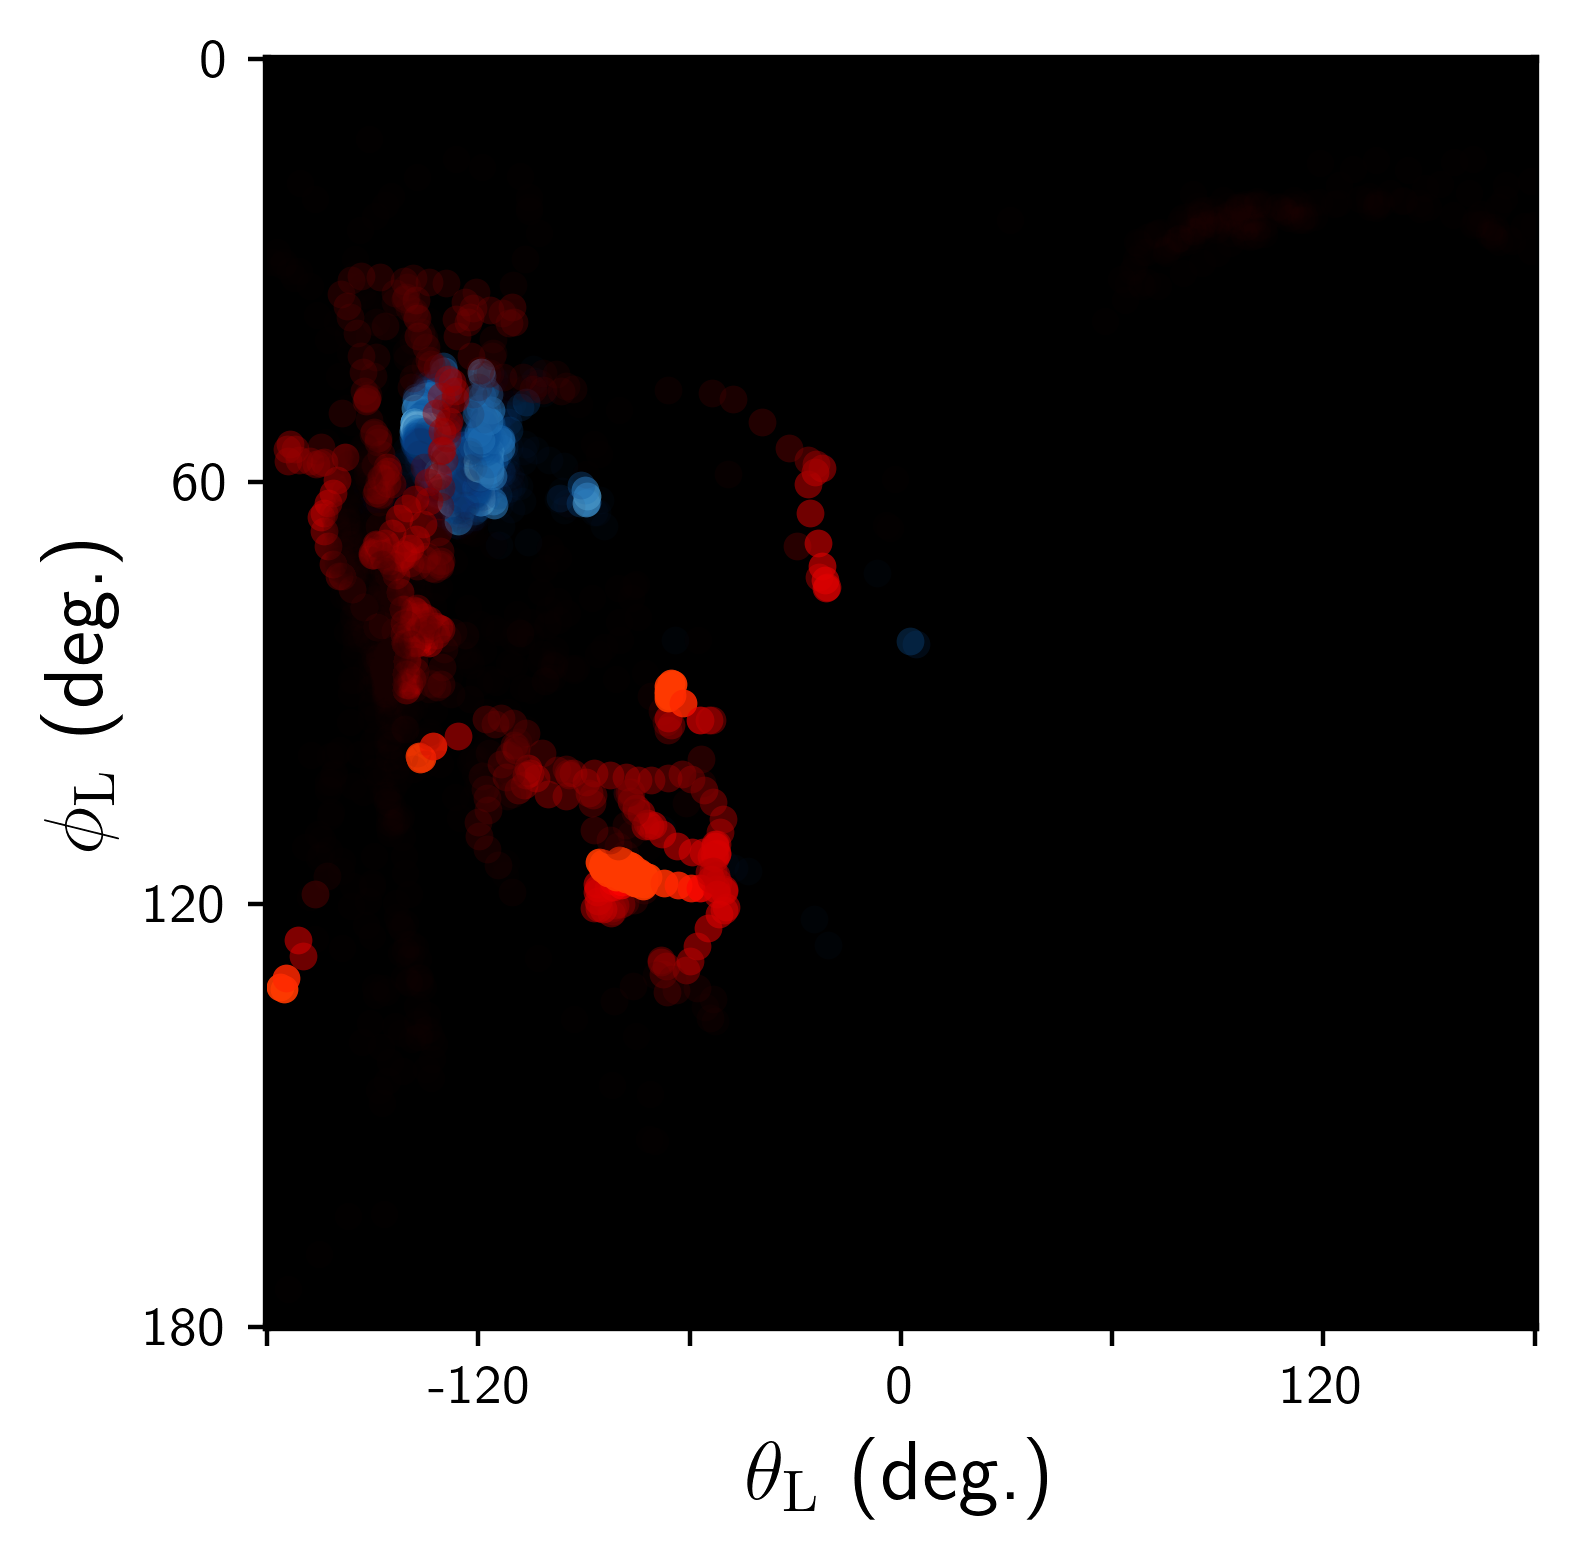

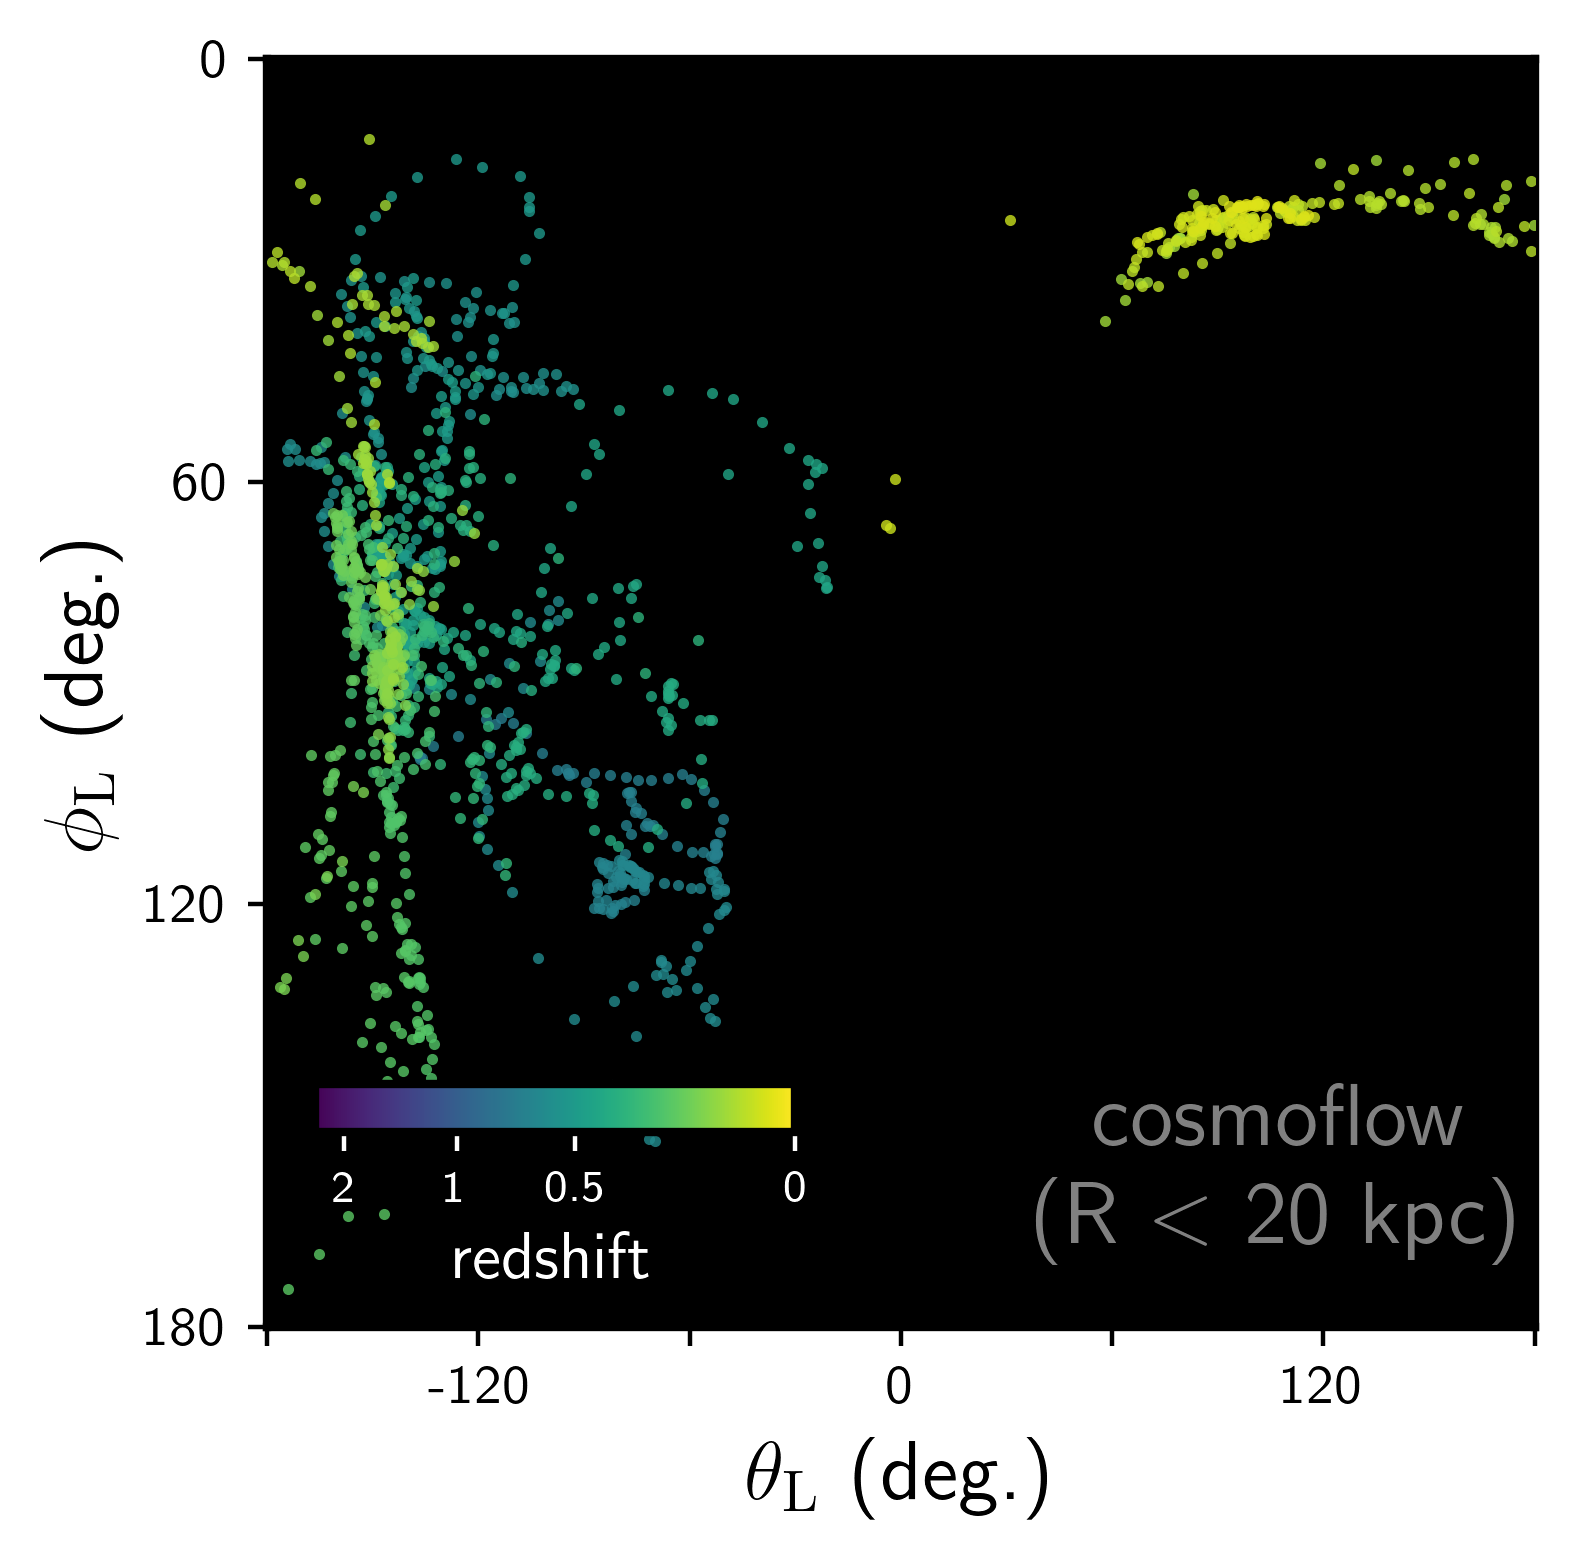

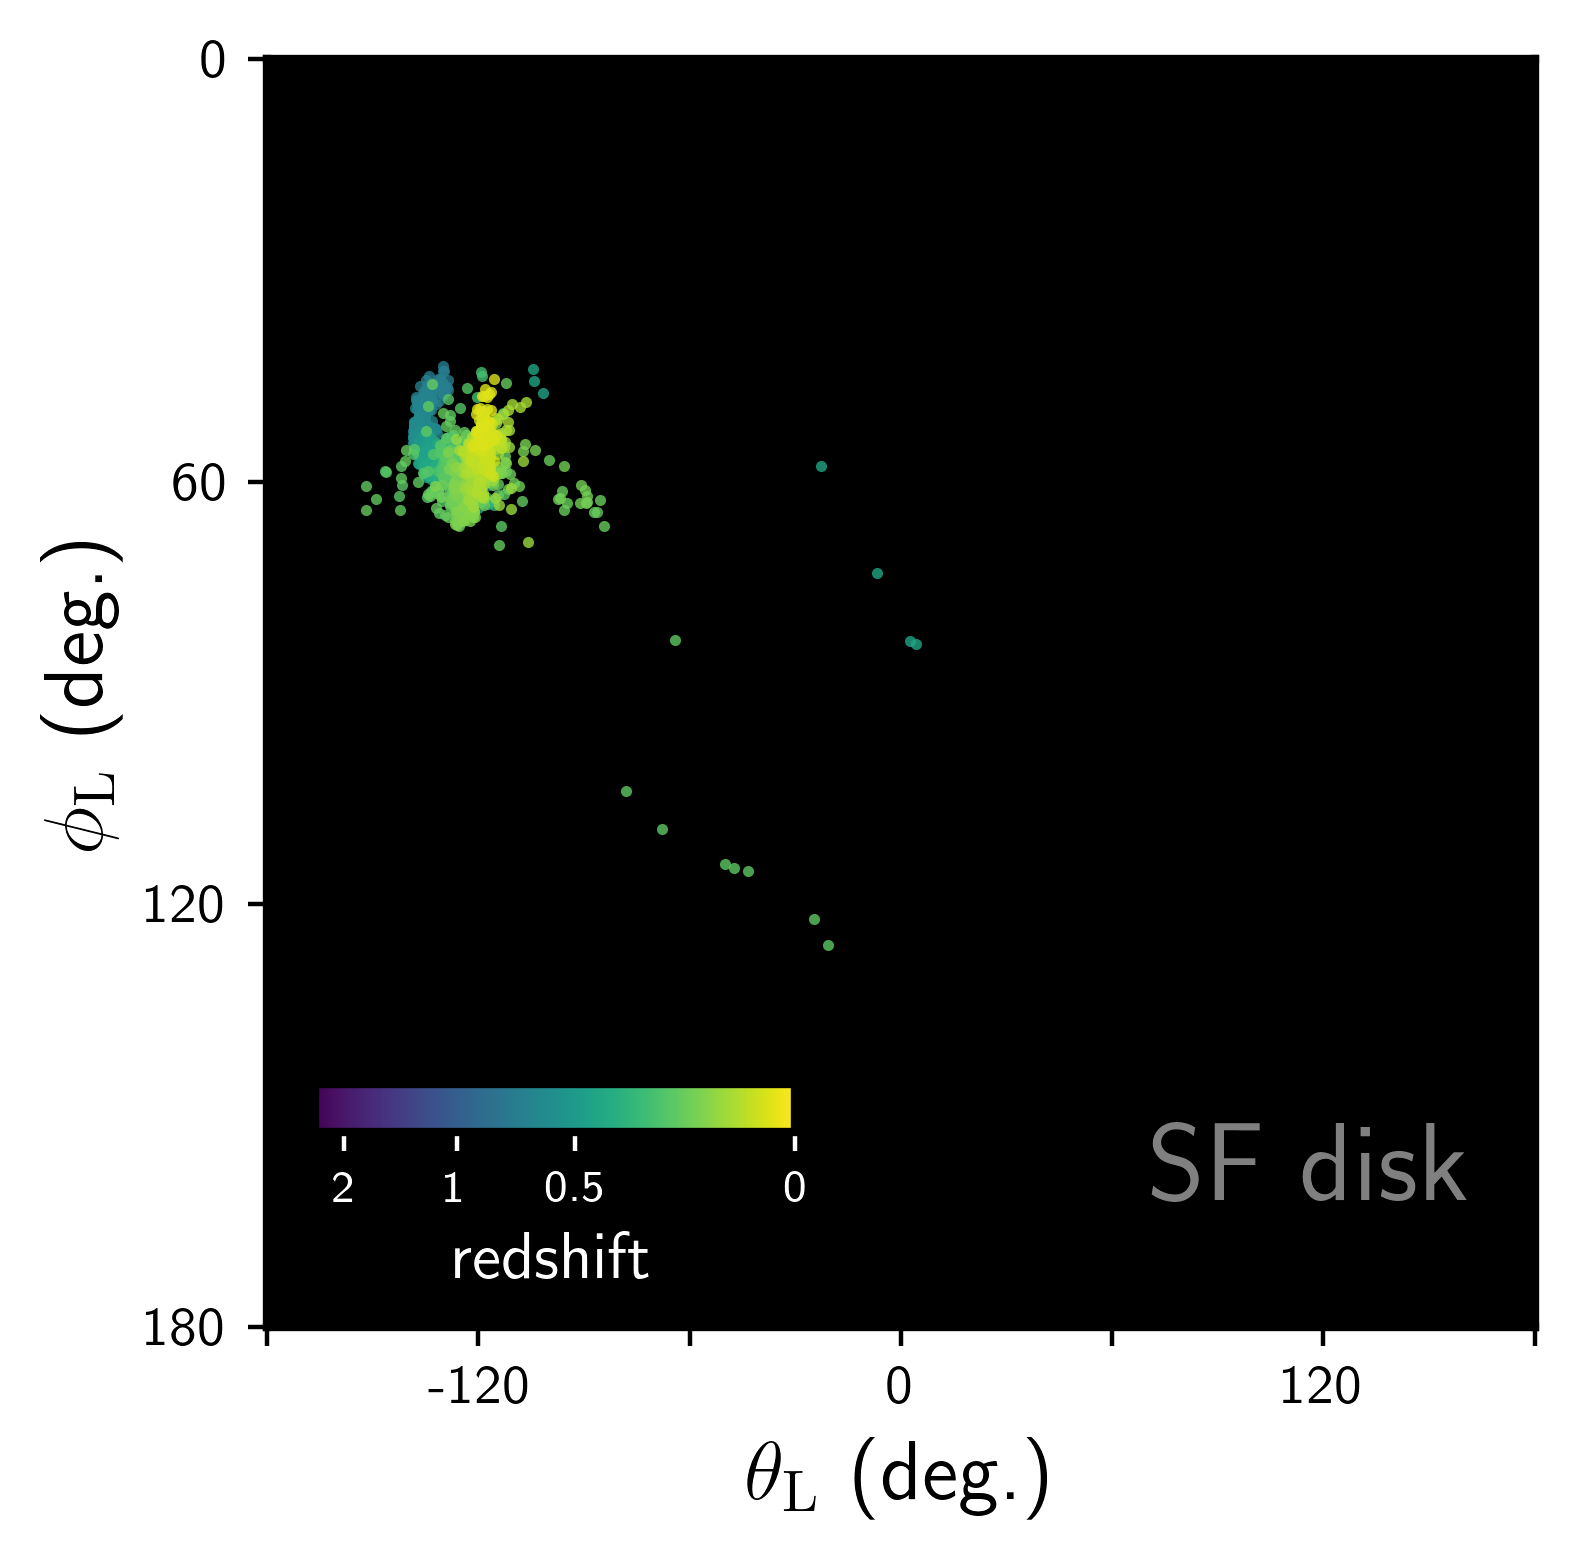

In [404]:
cmap_parent1 = copy.copy(mpl.cm.get_cmap("hot"))
cmap_parent1.set_bad('k')

cmap_parent2 = copy.copy(mpl.cm.get_cmap("Blues_r"))
cmap_parent2.set_bad('k')

cmap_parent3 = copy.copy(mpl.cm.get_cmap("viridis"))
cmap_parent3.set_bad('k')


cmaps = [truncate_colormap(cmap_parent1, 0.0, 0.5),\
         truncate_colormap(cmap_parent2, 0., 0.5),\
         truncate_colormap(cmap_parent3, 0.2, 0.95)
        ]


#fig2 = plt.figure(facecolor = 'white', figsize = (4,4))
#ax2 = plt.axes(projection='3d')
#mtype = 'stars_and_disk'

for halo in ['5036', '5016', '8508', '4123', '2392', '2878'][2:3]:
    if halo == '8508': 
        DDz3  = 273
        DDz25  = 362
        DDz2  = 486
        DDz1  = 971
        DDz05 = 1479
        DDz0  = 2427

    else: 
        DDz3  = 366
        DDz25  = 455
        DDz2  = 579
        DDz1  = 1064
        DDz05 = 1572
        DDz0  = 2520
    mtype = 'outflow_and_disk'
    mtype = 'disk_and_stars-galaxy'
    mtype = 'finflow-cgm_and_finflow-galaxy'
    mtype = 'halo_and_disk'
    mtype = 'cosmoflow_and_disk'
    mtype = 'halo-dm_and_disk'
    mtype = 'stars-galaxy_and_cosmoflow'
    mtype = 'cgm-gas_and_disk'
    mtype = 'cgm-warmhot_and_disk'
    mtype = 'cgm-cold_and_disk'
    mtype = 'cgm-cold_and_cosmoflow'
    mtype = 'cgm-cosmoflow_and_galaxy-cosmoflow'
    mtype = 'galaxy-gas-finflow_and_galaxy-gas-sinflow'
    mtype = 'galaxy-cosmoflow_and_disk'
    
    
    aa_arr = np.arange(2)

    mtype1 = mtype.split('_and_')[0]
    mtype2 = mtype.split('_and_')[1]


    fls = [sort(glob('/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/temp_save/Lprof_{}_DD????_{}.npy'.format(halo, mtype1))),\
           sort(glob('/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/temp_save/Lprof_{}_DD????_{}.npy'.format(halo, mtype2)))]


    means = {}
    for i in np.arange(2):
        means[i] = {}
        means[i]['thel'] = []
        means[i]['phil'] = []
        
    dots_all = {}
    for aa in np.arange(2): 
        dots_all[aa] = {}
        dots_all[aa]['thel_mean'] = []
        dots_all[aa]['phil_mean'] = []
        dots_all[aa]['logLsum']   = []
        dots_all[aa]['DD']        = []
        
    for aa in np.arange(2):
        fls_use = fls[aa]
        for fl in fls_use:
            DD = fl.split('/')[-1].split('_')[2].strip('DD')
            if (int(DD) < DDz1): continue
            a = np.load(fl, allow_pickle = True)[()]
            thel_mean = a['thel_mean']
            phil_mean = a['phil_mean']
            Lsum      = a['Lsum']
            logLsum = np.log10(Lsum.value)
            dots_all[aa]['logLsum'].append(logLsum)
            dots_all[aa]['thel_mean'].append(thel_mean)
            dots_all[aa]['phil_mean'].append(phil_mean)
            dots_all[aa]['DD'].append(int(DD))
        dots_all[aa]['logLsum'] = np.array(dots_all[aa]['logLsum'])
        dots_all[aa]['thel_mean'] = np.array(dots_all[aa]['thel_mean'])
        dots_all[aa]['phil_mean'] = np.array(dots_all[aa]['phil_mean'])
        dots_all[aa]['DD'] = np.array(dots_all[aa]['DD'])

    fig, ax = plt.subplots(1,1, facecolor = 'white', figsize = (4,4))
    im = ax.imshow(np.zeros((199, 199)) * np.nan, cmap = cmap_parent2, zorder = 0)

    for aa in np.arange(2):

        good_DD = dots_all[aa]['DD'] > DDz2

        clr_var = dots_all[aa]['logLsum'][good_DD]
        thel_mean_use = dots_all[aa]['thel_mean'][good_DD]
        phil_mean_use = dots_all[aa]['phil_mean'][good_DD]
        cmp = cmaps[aa]
        ms = 5
        vmn, vmx = np.percentile(clr_var, [60, 98.5])
        
        alpha = (clr_var - vmn)/(vmx - vmn)
        alpha[alpha < 0.1] = 0.05
        alpha[alpha > 0.9] = 0.9

        cc = (clr_var - vmn)/(vmx - vmn)
        cc[cc < 0.1] = 0.1
        cc[cc > 0.9] = 0.9
        for (thel_mean, phil_mean, alp, c) in zip(thel_mean_use, phil_mean_use, alpha, cc):
            ax.plot((thel_mean + 180)*(199/360.), phil_mean*(199/180.), marker = 'o', markersize = ms, 
                     color = cmp(c), markeredgecolor = 'None',linewidth = 0, alpha = alp, zorder = 10-aa)

            

        clr_var = np.array(dots_all[aa]['DD'])
        cmp = cmaps[-1]
        ms = 2
        alpha = np.ones(len(clr_var)) - 0.2
        cc = (clr_var - DDz25)/(DDz0 - DDz25)
        #cc[cc < 0.0] = 0.0
        #cc[cc > 1.0] = 1.0
        
        fig_ind, ax_ind = plt.subplots(1,1, facecolor = 'white', figsize = (4,4))
        cax_ind = fig_ind.add_axes([0.2, 0.28, 0.3, 0.03])
        for (thel_mean, phil_mean, alp, c) in zip(dots_all[aa]['thel_mean'], dots_all[aa]['phil_mean'], alpha, cc):
            ax_ind.plot((thel_mean + 180)*(199/360.), phil_mean*(199/180.), marker = 'o', markersize = ms, 
                     color = cmp(c), markeredgecolor = 'None',linewidth = 0, alpha = alp, zorder = 10-aa)

        im_ind = ax_ind.imshow(np.zeros((199, 199)) * np.nan, cmap = cmap_parent3, zorder = 0, vmin = DDz25, vmax = DDz0)
        cbar_ind = fig_ind.colorbar(im_ind, cax=cax_ind, orientation='horizontal')

        cbar_ind.ax.xaxis.set_tick_params(color='white', labelsize = 8)   
        plt.setp(plt.getp(cbar_ind.ax.axes, 'xticklabels'), color='white')
        cbar_ind.set_ticks([DDz2, DDz1, DDz05, DDz0])
        cbar_ind.set_label('redshift', color='white', fontsize = 12)
        cbar_ind.set_ticklabels(['2', '1', '0.5', '0'])
        ann_label = mtype.split('_and_')[aa]
        ann_ha = 'right'
        ann_hx = 0.95
        fs = 20

        if ann_label == 'disk': ann_label = 'SF disk'
        elif ann_label == 'stars-galaxy': 
            ann_label = 'stars\n(R $<$ 20 kpc)'
            ann_ha = 'center'
            ann_hx = 0.85
        elif ann_label == 'cgm-cosmoflow':
            ann_label = 'cosmoflow\n(R $>$ 20 kpc)'
            ann_ha = 'center'
            ann_hx = 0.80
            fs = 16
        elif ann_label == 'galaxy-cosmoflow':
            ann_label = 'cosmoflow\n(R $<$ 20 kpc)'
            ann_ha = 'center'
            ann_hx = 0.80
            fs = 16
        elif ann_label == 'galaxy-gas-finflow':
            ann_label = 'gas inflow\nR $<$ 20 kpc\nv$_{R}\,<\,100$ km/s'
            ann_ha = 'center'
            ann_hx = 0.80
            fs = 13
        ax_ind.annotate(ann_label, (ann_hx, 0.12), xycoords = 'axes fraction', 
                    ha = ann_ha, va = 'center', color = 'grey', fontweight = 'bold', fontsize = fs)

        ax_ind = add_ax_lbls(ax_ind)
        fig_ind.set_dpi(400)
        fig_ind.tight_layout()
        fig_ind.savefig('/Users/rsimons/Dropbox/foggie/angular_momentum/figures/thel_phil/dotplots/{}_{}.png'.format(halo, mtype.split('_and_')[aa]))



        
        
        thel1 = pi*(180+dots_all[aa]['thel_mean'][:-1])/180
        th1 = pi*(180+dots_all[aa]['thel_mean'][-1])/180
        thel2 = pi*(180+dots_all[aa]['thel_mean'][1:])/180

        phil1 = pi*dots_all[aa]['phil_mean'][:-1]/180
        ph1 = pi*dots_all[aa]['phil_mean'][-1]/180
        phil2 = pi*dots_all[aa]['phil_mean'][1:]/180


        eta = []
        thls = []
        phls = []

        #for (th1, th2, ph1, ph2) in zip(thel1, thel2, phil1, phil2):
        for (th2, ph2) in zip(thel2, phil2):
            eta.append(180/pi * np.arccos(np.cos(ph1) * np.cos(ph2) + \
                                          np.sin(ph1) * np.sin(ph2) * \
                                          np.cos(th1 -  th2)))


        eta = np.array(eta)
        eta_smooth  = np.array([np.mean(eta[np.max((i-50, 0)):np.min((i+50, len(eta)))]) for i in np.arange(len(eta))])
        thel_smooth = np.array([np.median(thel2[np.max((i-50, 0)):np.min((i+50, len(thel2)))]) for i in np.arange(len(thel2))])
        phil_smooth = np.array([np.median(phil2[np.max((i-50, 0)):np.min((i+50, len(phil2)))]) for i in np.arange(len(phil2))])
        DDs = dots_all[aa]['DD'][1:]
        if False:
            fig2, ax2 = plt.subplots(1,1, figsize = (5,3.5), facecolor = 'white')

            ax2.plot(DDs, eta, 'k-')
            ax2.plot(DDs, eta_smooth, 'b-')
            ax2.set_xticks([DDz3, DDz2, DDz1, DDz05, DDz0])
            ax2.set_xticklabels(['3', '2', '1', '0.5', '0'])
            ax2.set_xlabel('redshift')
            ax2.set_ylabel('disk orientation relative ($^\circ$)')
            ax2.set_ylim(0, 180)
            fig2.set_dpi(500)
            fig2.tight_layout()
            fig2.savefig('/Users/rsimons/Dropbox/foggie/angular_momentum/figures/thel_phil/dotplots/disk_orientation_{}_{}.png'.format(halo, figend))

        to_save = {}
        to_save['DD'] =          np.array(['DD%.4i'%DD for DD in DDs])
        to_save['phil_smooth'] = phil_smooth
        to_save['thel_smooth'] = thel_smooth

        np.save('/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/temp_save/smooth_pt_{}_{}.npy'.format(halo, figend), to_save)


    ax = add_ax_lbls(ax)
    fig.set_dpi(400)
    fig.tight_layout()
    fig.savefig('/Users/rsimons/Dropbox/foggie/angular_momentum/figures/thel_phil/dotplots/{}_{}.png'.format(halo, mtype))


    
    

In [349]:
DDs

[]

In [264]:
len(DDs)

2154

In [242]:
DDs

array([49.89045723, 56.40767731, 49.68063351, ..., 49.60116678,
       47.79728526, 46.90128253])

In [220]:
np.cos?

In [119]:
halo = '8508'
DD_z = np.load('/Users/rsimons/Dropbox/foggie/catalogs/DD_redshift.npy', allow_pickle = True)[()]


profdir = '/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/%s/rprof'%halo
all_rprof_fname = profdir + '/' + 'all_rprof_%s.npy'%halo
all_rprof = np.load(all_rprof_fname, allow_pickle = True)[()]

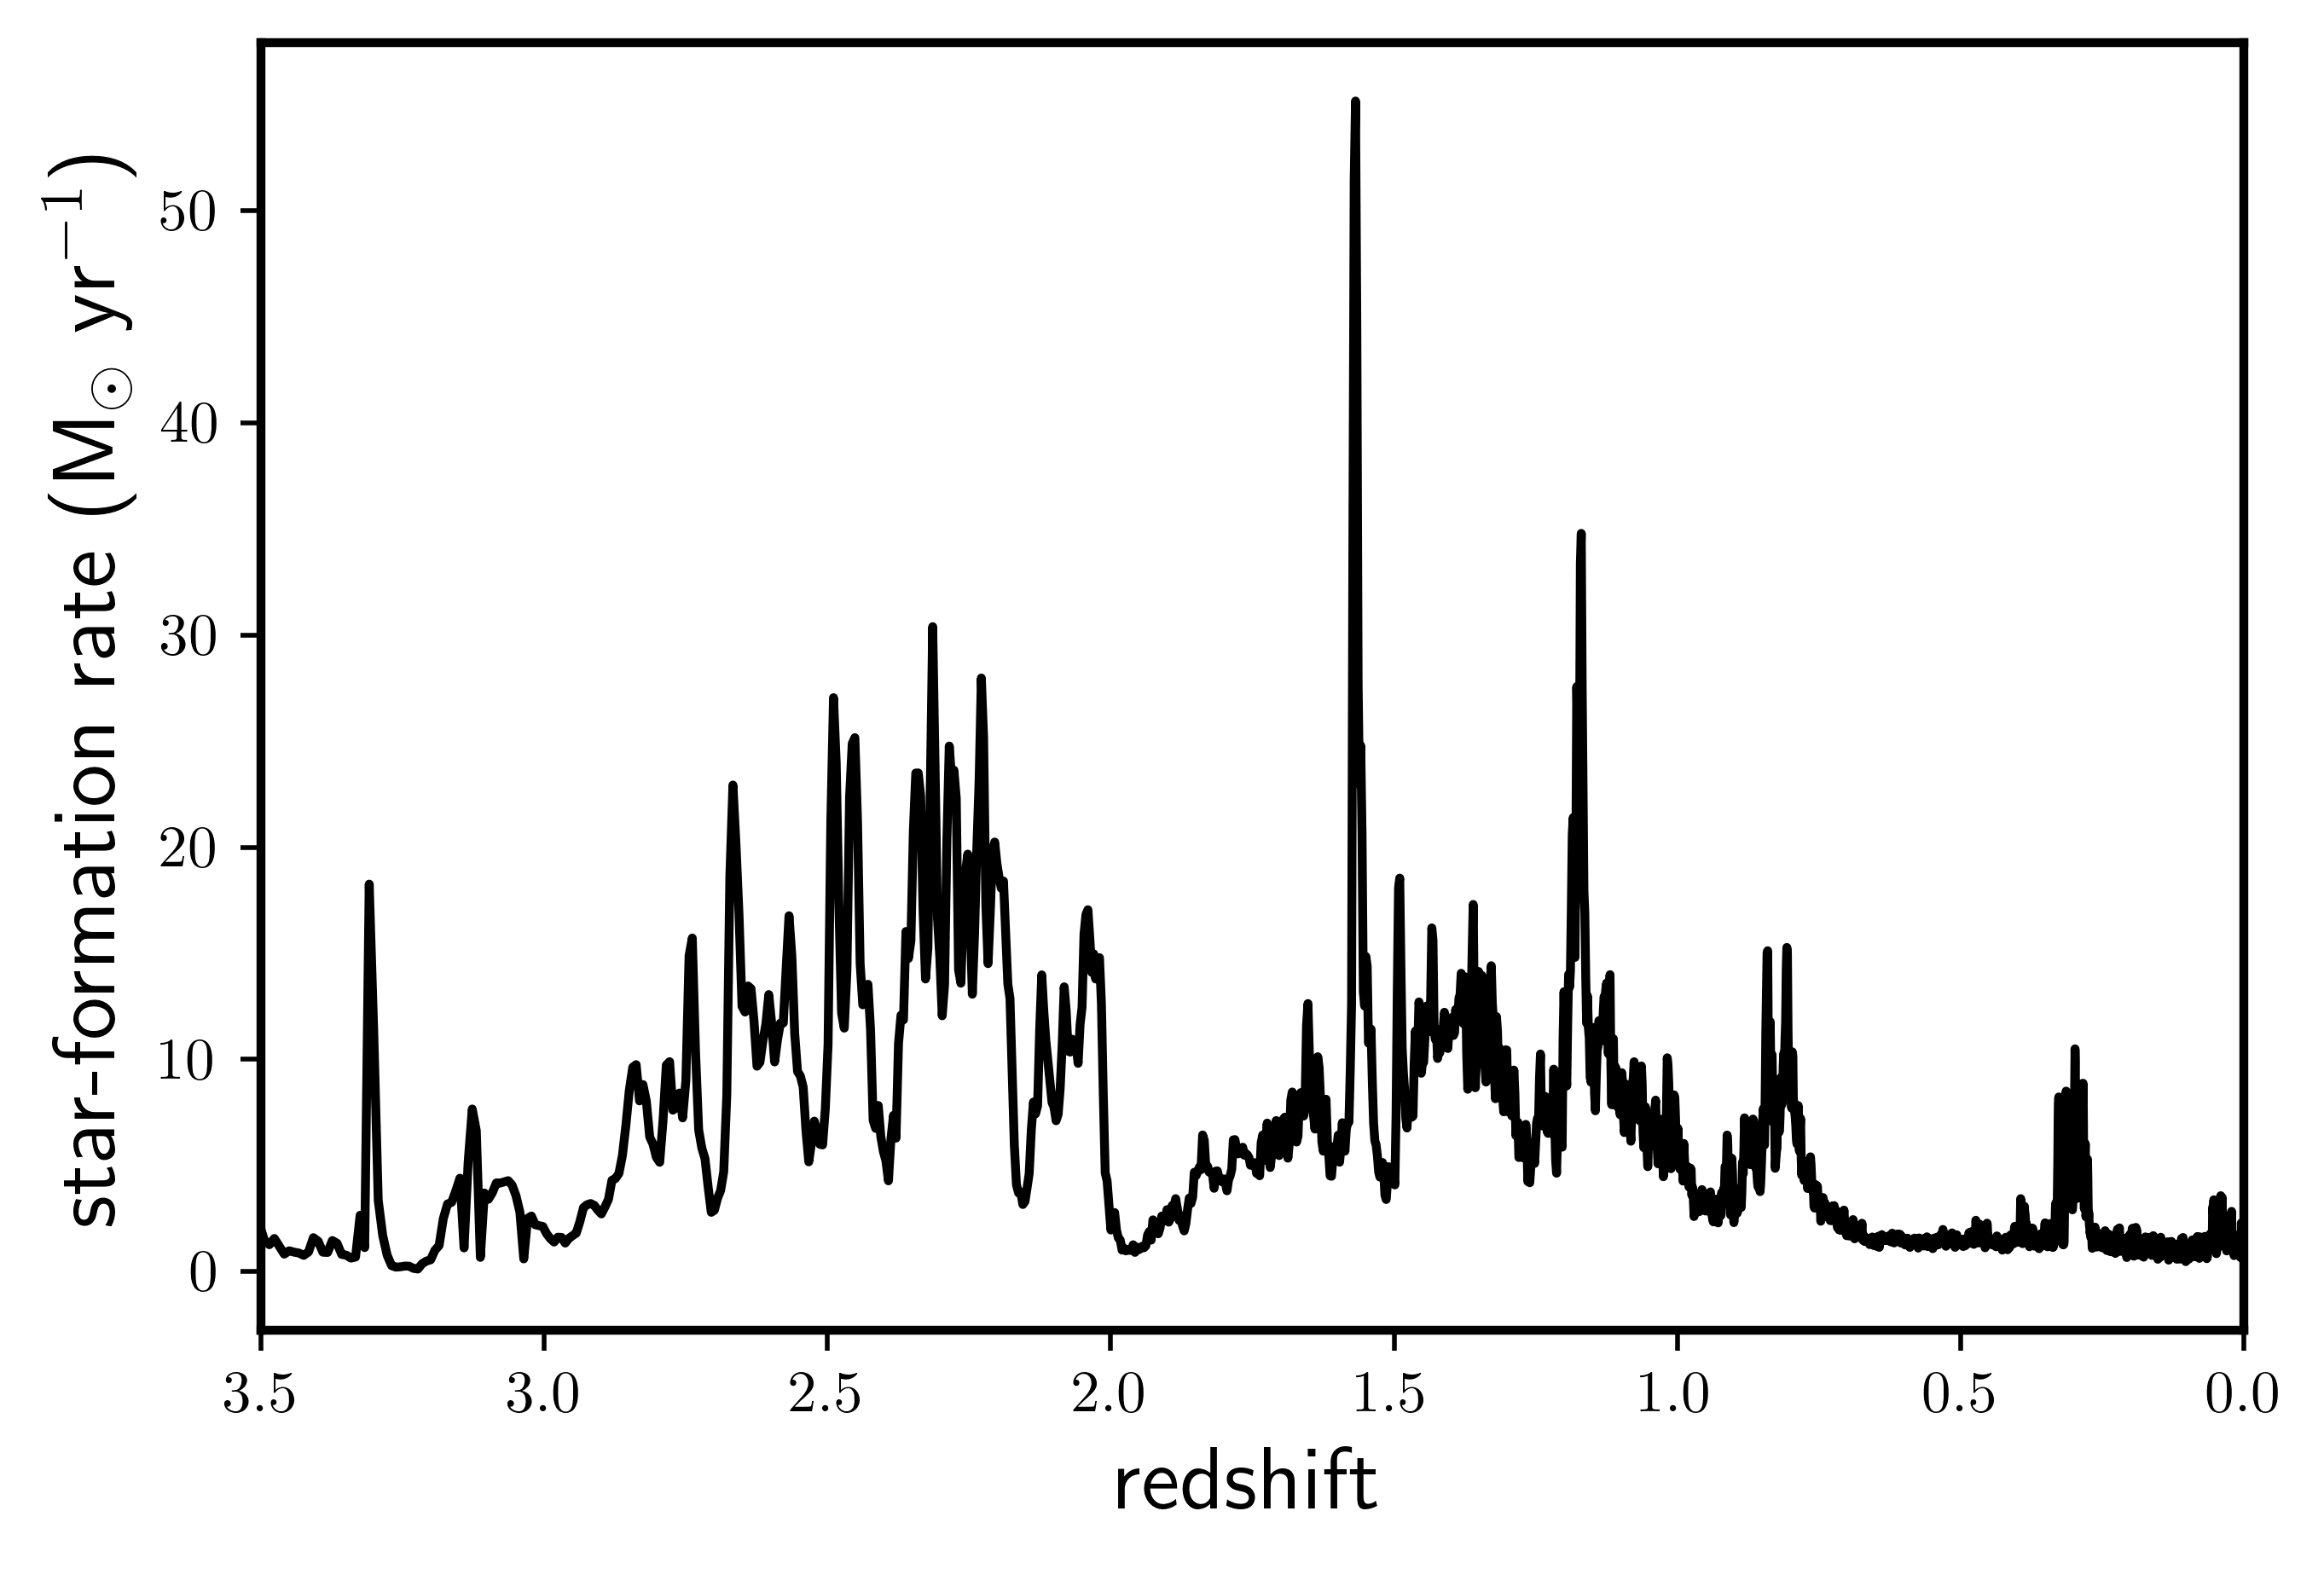

In [140]:
fig, ax = plt.subplots(1,1, figsize = (6, 4), facecolor = 'white')
import astropy.units as u
z_all = []
sfr_all = []
DD_all = []
for DD in all_rprof.keys():
    SFR = sum(all_rprof[DD]['young_stars']['rprof']['mass'][:40]).value*u.Msun/(1.e7 * u.yr)
    redshift = DD_z[halo]['DD%.4i'%int(DD)]
    z_all.append(float(redshift))
    sfr_all.append(SFR.value)
    DD_all.append(int(DD))
ax.plot(z_all, sfr_all, 'k-')
ax.set_xlim(3.5, 0)
ax.set_xlabel('redshift')
ax.set_ylabel('star-formation rate (M$_{\odot}$ yr$^{-1}$)')
fig.set_dpi(500)
for ii in np.arange(433, len(sfr_all)):
    z = z_all[ii]
    ax.axvline(x = z, color = 'red', linestyle = '--')
    fig.savefig('/Users/rsimons/Desktop/junk/%i.png'%ii)
    ax.lines[-1].remove()


In [143]:
cbar.vmin = 3

In [ ]:
ffmpeg -f image2 -r 12 -pattern_type glob -i '*.png' -vcodec libx264 -crf 25  -pix_fmt yuv420p temp_sfr.mp4